In [ ]:
!nvidia-smi
#노트북 그래픽 카드 문제로 인해 코랩으로 진행 - intel그래픽카드로는 nvidia 드라이버 설치 불가

Sun Feb 12 11:16:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    30W /  70W |      0MiB / 15360MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Darknet 설치

In [ ]:
!git clone https://github.com/pjreddie/darknet.git
#darknet 깃허브 저장소 복제
#darknet -> CUDA 에 쓰이는 neural network framework, 파이토치 기능?

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
import os
os.chdir("/content/darknet/")
!ls

cfg	  include	LICENSE.gen   LICENSE.mit  python     src
data	  LICENSE	LICENSE.gpl   LICENSE.v1   README.md
examples  LICENSE.fuck	LICENSE.meta  Makefile	   scripts


In [ ]:
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [ ]:
!make
#다크넷 설치 완료

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
  232 |         cudaThreadSynchronize();
      |         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1054:57: note: declared here
 1054 | extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
      |                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./

#Yolo pre trained model 가중치 파일

In [ ]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights
#일련의 가중치가 포함된 파일

--2023-02-12 11:16:48--  http://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolov1/yolov1.weights [following]
--2023-02-12 11:16:48--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  29.8MB/s    in 32s     

2023-02-12 11:17:20 (23.6 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



In [ ]:
! ./content/darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/dog.jpg
#/content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/dog.jpg
#/content/darknet/yolov1.weights
#/content/darknet

/bin/bash: ./content/darknet: No such file or directory


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#이미지 객체 탐지

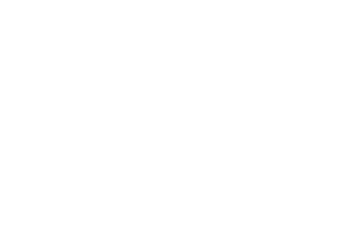

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')

file = '/content/darknet/predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imgshow(show_img)

In [ ]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/kite.jpg
#여기서부터 오류나서 진행불가

/bin/bash: ./darknet: No such file or directory


2

In [ ]:
!git clone --quiet https://github.com/subodh-malgonde/vehicle-detection.git
!mv vehicle-detection/* .
!wget https://pjreddie.com/media/files/yolo-tiny.weights
!wget http://drouyer.com/yolo-tiny.weights
!wget http://boucantrin.ovh.hw.ipol.im/static/facciolo/yolo-tiny.weights

mv: cannot move 'vehicle-detection/examples' to './examples': Directory not empty
--2023-01-07 06:51:32--  https://pjreddie.com/media/files/yolo-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180357512 (172M) [application/octet-stream]
Saving to: ‘yolo-tiny.weights’

yolo-tiny.weights   100%[===================>] 172.00M  52.5MB/s    in 3.4s    

2023-01-07 06:51:36 (50.2 MB/s) - ‘yolo-tiny.weights’ saved [180357512/180357512]

--2023-01-07 06:51:36--  http://drouyer.com/yolo-tiny.weights
Resolving drouyer.com (drouyer.com)... 213.186.33.3
Connecting to drouyer.com (drouyer.com)|213.186.33.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180357512 (172M)
Saving to: ‘yolo-tiny.weights.1’

yolo-tiny.weights.1 100%[===================>] 172.00M  27.5MB/s    in 7.3s    

2023-01-07 06:51:43 (23.6 MB/s) - ‘yolo-tiny.

In [ ]:
!wget http://boucantrin.ovh.hw.ipol.im/static/facciolo/yolo-tiny.weights

--2023-01-07 06:52:00--  http://boucantrin.ovh.hw.ipol.im/static/facciolo/yolo-tiny.weights
Resolving boucantrin.ovh.hw.ipol.im (boucantrin.ovh.hw.ipol.im)... 54.36.51.141
Connecting to boucantrin.ovh.hw.ipol.im (boucantrin.ovh.hw.ipol.im)|54.36.51.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180357512 (172M) [application/octet-stream]
Saving to: ‘yolo-tiny.weights.3’

yolo-tiny.weights.3 100%[===================>] 172.00M  24.8MB/s    in 7.7s    

2023-01-07 06:52:08 (22.3 MB/s) - ‘yolo-tiny.weights.3’ saved [180357512/180357512]



In [ ]:
! pip install

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline


import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape

In [ ]:
from keras import backend as K

#K.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')

In [ ]:
# Pre trained weights require this ordering
#keras.backend.set_image_dim_ordering('th')

def get_model():
    model = Sequential()

    # Layer 1
    model.add(Convolution2D(16, 3, 3,input_shape=(3,448,448),border_mode='same',subsample=(1,1)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    model.add(Convolution2D(32,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

    # Layer 3
    model.add(Convolution2D(64,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

    # Layer 4
    model.add(Convolution2D(128,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

    # Layer 5
    model.add(Convolution2D(256,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

    # Layer 6
    model.add(Convolution2D(512,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))

    # Layer 7
    model.add(Convolution2D(1024,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Layer 8
    model.add(Convolution2D(1024,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Layer 9
    model.add(Convolution2D(1024,3,3 ,border_mode='same'))
    model.add(LeakyReLU(alpha=0.1))

    model.add(Flatten())

    # Layer 10
    model.add(Dense(256))

    # Layer 11
    model.add(Dense(4096))
    model.add(LeakyReLU(alpha=0.1))

    # Layer 12
    model.add(Dense(1470))

    return model

In [ ]:
# Preprocessing

def crop_and_resize(image):
    #cropped = image[300:650,500:,:]
    return cv2.resize(image, (448,448))

def normalize(image):
    normalized = 2.0*image/255.0 - 1
    return normalized

def preprocess(image):
    cropped = crop_and_resize(image)
    normalized = normalize(cropped)
    # The model works on (channel, height, width) ordering of dimensions
    transposed = np.transpose(normalized, (2,0,1))
    return transposed

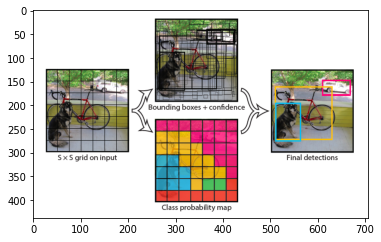

In [ ]:
image = mpimg.imread('yolo.png')
plt.imshow(image)

In [ ]:
# code based on:
# YAD2K https://github.com/allanzelener/YAD2K
# darkflow https://github.com/thtrieu/darkflow
# Darknet.keras https://github.com/sunshineatnoon/Darknet.keras
# https://github.com/xslittlegrass/CarND-Vehicle-Detection

# Box util methods

class Box:
    def __init__(self):
        self.x, self.y = float(), float()
        self.w, self.h = float(), float()
        self.c = float()
        self.prob = float()

def overlap(x1, w1, x2, w2):
    l1 = x1 - w1 / 2.
    l2 = x2 - w2 / 2.
    left = max(l1, l2)
    r1 = x1 + w1 / 2.
    r2 = x2 + w2 / 2.
    right = min(r1, r2)
    return right - left


def box_intersection(a, b):
    """

    :param a: Box 1
    :param b: Box 2
    :return: Intersection area of the 2 boxes
    """
    w = overlap(a.x, a.w, b.x, b.w)
    h = overlap(a.y, a.h, b.y, b.h)
    if w < 0 or h < 0:
        return 0
    area = w * h
    return area


def box_union(a, b):
    """

    :param a: Box 1
    :param b: Box 2
    :return: Area under the union of the 2 boxes
    """
    i = box_intersection(a, b)
    u = a.w * a.h + b.w * b.h - i
    return u


def box_iou(a, b):
    """

    :param a: Box 1
    :param b: Box 2
    :return: Intersection over union, which is ratio of intersection area to union area of the 2 boxes
    """
    return box_intersection(a, b) / box_union(a, b)



def yolo_output_to_car_boxes(yolo_output, threshold=0.2, sqrt=1.8, C=20, B=2, S=7):

    # Position for class 'car' in the VOC dataset classes
    car_class_number = 6

    boxes = []
    SS = S*S  # number of grid cells
    prob_size = SS*C  # class probabilities
    conf_size = SS*B  # confidences for each grid cell

    probabilities = yolo_output[0:prob_size]
    confidence_scores = yolo_output[prob_size: (prob_size + conf_size)]
    cords = yolo_output[(prob_size + conf_size):]

    # Reshape the arrays so that its easier to loop over them
    probabilities = probabilities.reshape((SS, C))
    confs = confidence_scores.reshape((SS, B))
    cords = cords.reshape((SS, B, 4))

    for grid in range(SS):
        for b in range(B):
            bx = Box()

            bx.c = confs[grid, b]

            # bounding box xand y coordinates are offsets of a particular grid cell location,
            # so they are also bounded between 0 and 1.
            # convert them absolute locations relative to the image size
            bx.x = (cords[grid, b, 0] + grid % S) / S
            bx.y = (cords[grid, b, 1] + grid // S) / S


            bx.w = cords[grid, b, 2] ** sqrt
            bx.h = cords[grid, b, 3] ** sqrt

            # multiply confidence scores with class probabilities to get class sepcific confidence scores
            p = probabilities[grid, :] * bx.c

            # Check if the confidence score for class 'car' is greater than the threshold
            if p[car_class_number] >= threshold:
                bx.prob = p[car_class_number]
                boxes.append(bx)

    # combine boxes that are overlap

    # sort the boxes by confidence score, in the descending order
    boxes.sort(key=lambda b: b.prob, reverse=True)


    for i in range(len(boxes)):
        boxi = boxes[i]
        if boxi.prob == 0:
            continue

        for j in range(i + 1, len(boxes)):
            boxj = boxes[j]

            # If boxes have more than 40% overlap then retain the box with the highest confidence score
            if box_iou(boxi, boxj) >= 0.4:
                boxes[j].prob = 0

    boxes = [b for b in boxes if b.prob > 0]

    return boxes


def draw_boxes(boxes,im, crop_dim):
    imgcv1 = im.copy()
    [xmin, xmax] = crop_dim[0]
    [ymin, ymax] = crop_dim[1]

    height, width, _ = imgcv1.shape
    for b in boxes:
        w = xmax - xmin
        h = ymax - ymin

        left  = int ((b.x - b.w/2.) * w) + xmin
        right = int ((b.x + b.w/2.) * w) + xmin
        top   = int ((b.y - b.h/2.) * h) + ymin
        bot   = int ((b.y + b.h/2.) * h) + ymin

        if left  < 0:
            left = 0
        if right > width - 1:
            right = width - 1
        if top < 0:
            top = 0
        if bot>height - 1:
            bot = height - 1

        thick = 5 #int((height + width // 150))

        cv2.rectangle(imgcv1, (left, top), (right, bot), (255,0,0), thick)

    return imgcv1

In [ ]:
import utils

In [ ]:
# Load weights
from utils import load_weights

model = get_model()
load_weights(model,'yolo-tiny.weights')

TypeError: ignored